# Dataset Description: Titanic Survival Data
The dataset used for this analysis is a subset of the Titanic Survival Dataset, which contains information about the passengers onboard the Titanic. The main objective is to predict whether a passenger survived or not, based on certain features.

The dataset used for this analysis is a subset of the Titanic Survival Dataset available on Kaggle.


### Features Included:

Pclass — Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)

Sex — Gender of the passenger (male or female)

Age — Age of the passenger (in years)

Fare — The amount of money paid for the ticket

Embarked — Port of Embarkation (0 = Cherbourg, 1 = Queenstown, 2 = Southampton)

### Target Variable:
Survived — Survival status of the passenger (0 = No, 1 = Yes)

In [129]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

## Data Preprocessing and Splitting

In [132]:
# Load the data
df = pd.read_csv("Documents/Book 1(Sheet1)-2.csv")
print(df.info())

# Label Encoding for categorical features
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

df['Sex'] = le_sex.fit_transform(df['Sex'])
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])

# Feature Scaling
X = df[['Sex', 'Pclass', 'Embarked', 'Age', 'Fare']]
y = df['Survived']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split (60% Training, 20% Validation, 20% Test)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("\nData Preprocessing and Splitting Done Successfully!")
print(f"Training Set Size: {X_train.shape}")
print(f"Validation Set Size: {X_val.shape}")
print(f"Test Set Size: {X_test.shape}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   Fare         714 non-null    float64
 7   Embarked     712 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 44.8+ KB
None

Data Preprocessing and Splitting Done Successfully!
Training Set Size: (428, 5)
Validation Set Size: (143, 5)
Test Set Size: (143, 5)


## Support Vector Machine (SVM)

Support Vector Machine (SVM) Performance on Validation Set
Accuracy: 0.7972027972027972

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.91      0.84        87
           1       0.81      0.62      0.71        56

    accuracy                           0.80       143
   macro avg       0.80      0.77      0.78       143
weighted avg       0.80      0.80      0.79       143



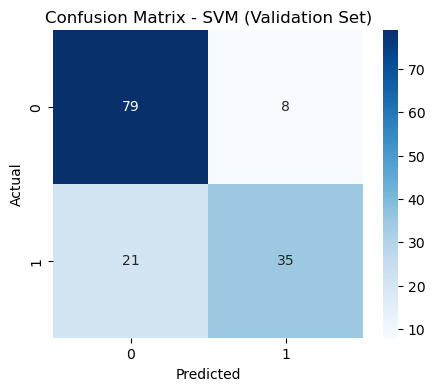

In [135]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the model and Train the model
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Predictions on the validation set
y_val_pred_svm = svm_model.predict(X_val)

# Evaluate the model
print("Support Vector Machine (SVM) Performance on Validation Set")
print("Accuracy:", accuracy_score(y_val, y_val_pred_svm))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred_svm))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_val, y_val_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM (Validation Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Decision Tree Classifier

Decision Tree Performance on Validation Set
Accuracy: 0.7622377622377622

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81        87
           1       0.70      0.68      0.69        56

    accuracy                           0.76       143
   macro avg       0.75      0.75      0.75       143
weighted avg       0.76      0.76      0.76       143



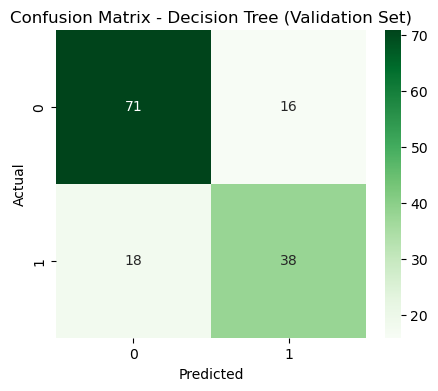

In [138]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Decision Tree model and Train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on validation data
y_val_pred_dt = dt_model.predict(X_val)

# Evaluate the model
print("Decision Tree Performance on Validation Set")
print("Accuracy:", accuracy_score(y_val, y_val_pred_dt))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred_dt))

# Confusion Matrix plot
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_val, y_val_pred_dt), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Decision Tree (Validation Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## K-Nearest Neighbors (KNN) Classifier 

KNN Performance on Validation Set
Accuracy: 0.8041958041958042

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84        87
           1       0.74      0.77      0.75        56

    accuracy                           0.80       143
   macro avg       0.79      0.80      0.80       143
weighted avg       0.81      0.80      0.80       143



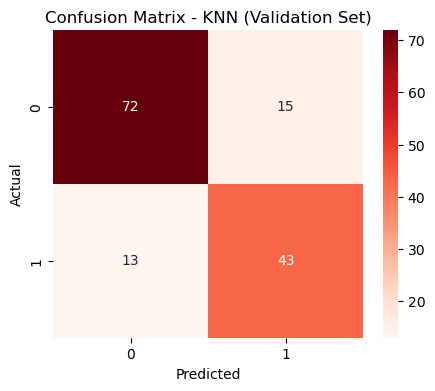

In [141]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the KNN model and Train the model
knn_model = KNeighborsClassifier(n_neighbors=5) #(let's start with k=5)
knn_model.fit(X_train, y_train)

# Predict on validation data
y_val_pred_knn = knn_model.predict(X_val)

# Evaluate the model
print("KNN Performance on Validation Set")
print("Accuracy:", accuracy_score(y_val, y_val_pred_knn))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred_knn))

# Confusion Matrix plot
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_val, y_val_pred_knn), annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix - KNN (Validation Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Validation Accuracy comparison of all models 

In [144]:
# Validation Accuracy of All Models
knn_val_acc = accuracy_score(y_val, y_val_pred_knn)
dt_val_acc = accuracy_score(y_val, y_val_pred_dt)
svm_val_acc = accuracy_score(y_val, y_val_pred_svm)

print("\n Validation Accuracies:")
print(f"KNN Accuracy: {knn_val_acc}")
print(f"Decision Tree Accuracy: {dt_val_acc}")
print(f"SVM Accuracy: {svm_val_acc}")



 Validation Accuracies:
KNN Accuracy: 0.8041958041958042
Decision Tree Accuracy: 0.7622377622377622
SVM Accuracy: 0.7972027972027972


## Test Accuracy comparison of all models 

In [147]:
from sklearn.metrics import accuracy_score

# Test predictions
knn_test_pred = knn_model.predict(X_test)
dt_test_pred = dt_model.predict(X_test)
svm_test_pred = svm_model.predict(X_test)

# Test accuracies
knn_test_acc = accuracy_score(y_test, knn_test_pred)
dt_test_acc = accuracy_score(y_test, dt_test_pred)
svm_test_acc = accuracy_score(y_test, svm_test_pred)

print("\n Test Accuracies:")
print(f"KNN Accuracy: {knn_test_acc}")
print(f"Decision Tree Accuracy: {dt_test_acc}")
print(f"SVM Accuracy: {svm_test_acc}")



 Test Accuracies:
KNN Accuracy: 0.7412587412587412
Decision Tree Accuracy: 0.7342657342657343
SVM Accuracy: 0.7482517482517482


## Ensemble Model using Voting Classifier


 Ensemble Model Results:
Test Data Accuracy (Ensemble): 0.7482517482517482

Confusion Matrix:
 [[67 11]
 [25 40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.86      0.79        78
           1       0.78      0.62      0.69        65

    accuracy                           0.75       143
   macro avg       0.76      0.74      0.74       143
weighted avg       0.75      0.75      0.74       143



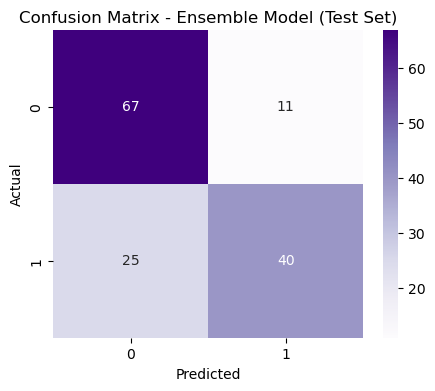

In [150]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the ensemble model with correct model names
ensemble_model = VotingClassifier(estimators=[
    ('knn', knn_model),
    ('dt', dt_model),
    ('svm', svm_model)
], voting='hard')  # Use 'soft' for probability-based voting

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Predictions on the test set
ensemble_pred = ensemble_model.predict(X_test)

# Evaluate the ensemble model
print("\n Ensemble Model Results:")
print("Test Data Accuracy (Ensemble):", accuracy_score(y_test, ensemble_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, ensemble_pred))
print("\nClassification Report:\n", classification_report(y_test, ensemble_pred))

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, ensemble_pred), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - Ensemble Model (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

